In [1]:
import os
os.chdir(r'C:\Users\82107\Desktop\Study\ML learning')
print('current directory:', os.getcwd())

current directory: C:\Users\82107\Desktop\Study\ML learning


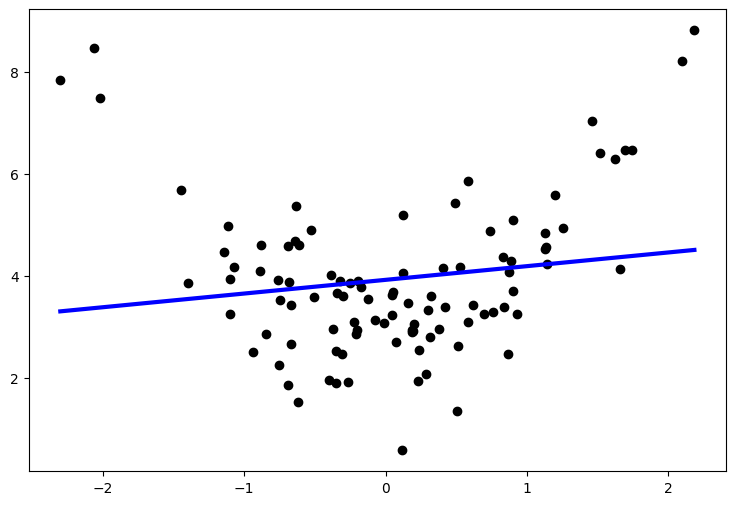

In [3]:
# 행렬을 다루기 위한 모듈을 불러온다.
import numpy as np 
# plot을 그리기 위한 모듈을 불러온다.
import matplotlib.pylab as plt 
# 선형회귀모형을 사용할 수 있는 모듈을 불러온다.
import statsmodels.api as sm

np.random.seed(1)
n = 100
x = np.sort(np.random.normal(size=n))
y = 3 + np.power(x, 2) + np.random.normal(size=n)

# 선형 회귀모형 적합
linear_reg = sm.OLS(y, sm.add_constant(x)).fit()    # 데이터 생성모형이 x^2인데 선형모형으로 적합하면 어떤 결과가 나오는지 확인하기 위해 선형 회귀모형으로 적합함

# 적합 결과 확인
beta0 = linear_reg.params[0]
beta1 = linear_reg.params[1]
t = np.linspace(np.min(x), np.max(x), endpoint=True)
plt.figure(figsize=(9, 6))
plt.plot(x, y, 'o', color='black')
plt.plot(t, beta0 + beta1*t, c='blue', linewidth=3)

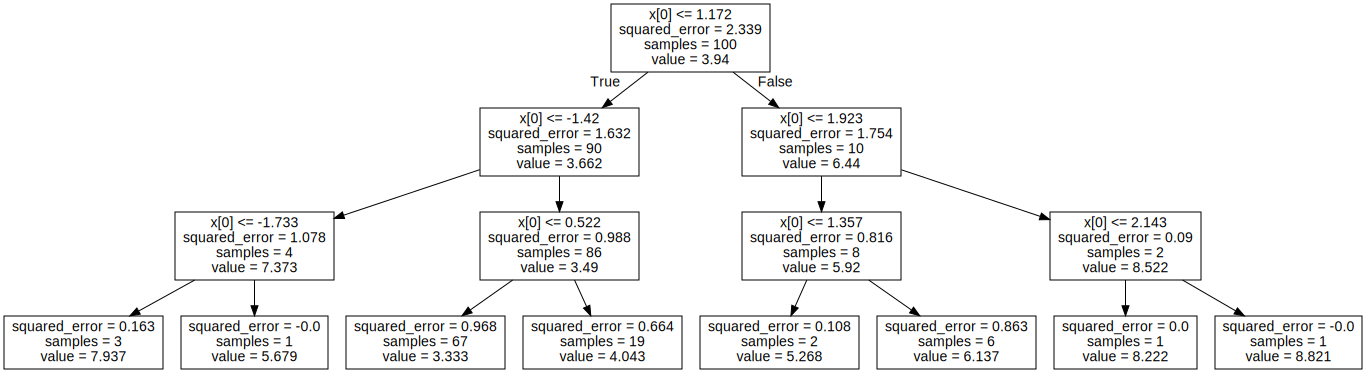

In [7]:
from sklearn.tree import DecisionTreeRegressor
regtree = DecisionTreeRegressor(max_depth=3, 
                                random_state=0).fit(x[:, np.newaxis], y[:, np.newaxis])
from sklearn.tree import export_graphviz
dot_data = export_graphviz(regtree, out_file = None)  
# install graphviz: 
# https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/graphviz-2.38-win32.msi
import os
os.environ['PATH'] += os.pathsep + r'C:\Program Files\Graphviz\bin'
import graphviz
graphviz.Source(dot_data, format='png')

In [10]:
test_x = np.arange(np.min(x), np.max(x), 0.01)
pred_regtree = regtree.predict(test_x[:, np.newaxis])
pred_regtree[:5]

array([7.93714289, 7.93714289, 7.93714289, 7.93714289, 7.93714289])

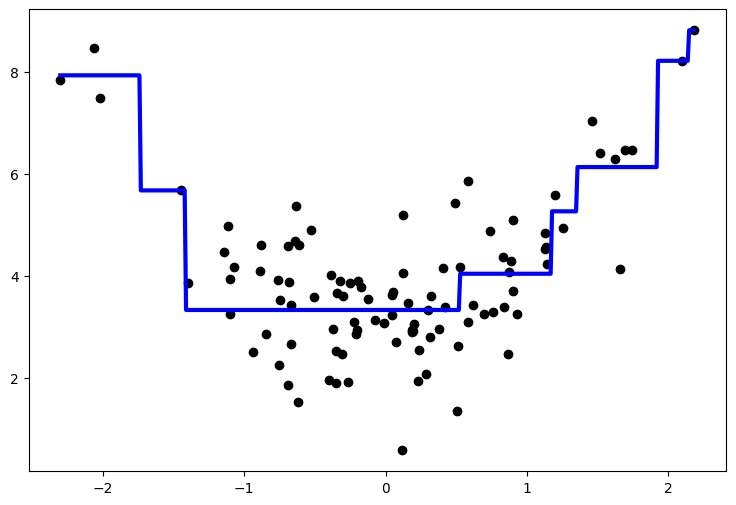

In [11]:
plt.figure(figsize=(9, 6))
plt.plot(x, y, 'o', color='black')
plt.plot(test_x, pred_regtree, color='blue', linewidth=3)

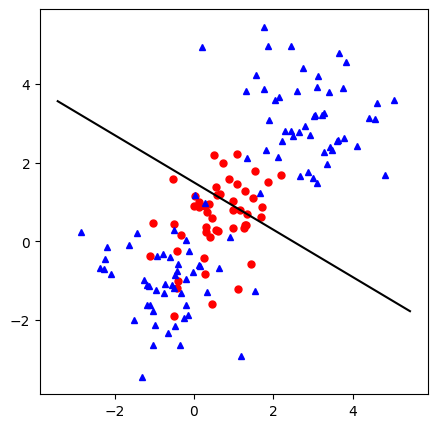

In [12]:
np.random.seed(1)
n = 50
data1 = np.random.multivariate_normal((0.7, 0.7), np.array([[1, 0.5], [0.5, 1]]), n)    # 평균이 (0.7, 0.7) 2차원이고, 분산이 각각 1이고 공분산이 0.5인 공분산행렬
data2 = np.random.multivariate_normal((-1, -1), np.array([[1, 0], [0, 1]]), n)
data3 = np.random.multivariate_normal((3, 3), np.array([[1, 0], [0, 1]]), n)
data = np.vstack((data1, data2, data3))
label = np.ones((3*n, 1))
label[:n, :] = 0    #data1에 라벨을 0으로 설정

fig, ax = plt.subplots(1,1, figsize=(5,5))
colors = ['red', 'blue']
markers = ['o', '^']
for i in range(2):
    if i == 0:
        ax.plot(data[:n,0], data[:n,1],     #data1
                color=colors[0], linestyle='', marker=markers[i], markersize=5)
    else:
        ax.plot(data[n:,0], data[n:,1],     #data2, data3
                color=colors[1], linestyle='', marker=markers[i], markersize=5)
t = np.linspace(np.min(data), np.max(data), endpoint=True)

ax.plot(t, -0.6*t + 1.5, c='black')

In [13]:
linear_reg = sm.OLS(label, sm.add_constant(data)).fit()
linear_reg.params

array([0.63013505, 0.03304749, 0.00640241])

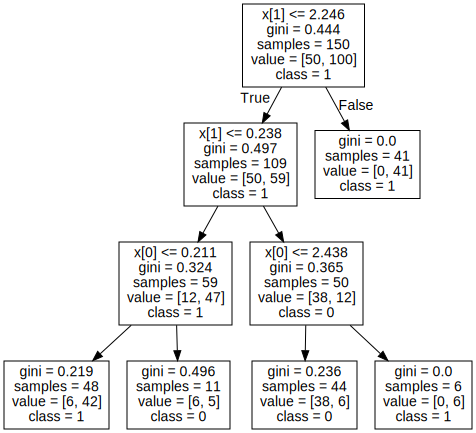

In [14]:
from sklearn.tree import DecisionTreeClassifier 
clftree = DecisionTreeClassifier(max_depth=3, 
                                 max_features=2,
                                 random_state=0).fit(data, label)

cn=['0', '1']
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clftree, class_names=cn, out_file = None)  
import graphviz
graphviz.Source(dot_data, format='png')

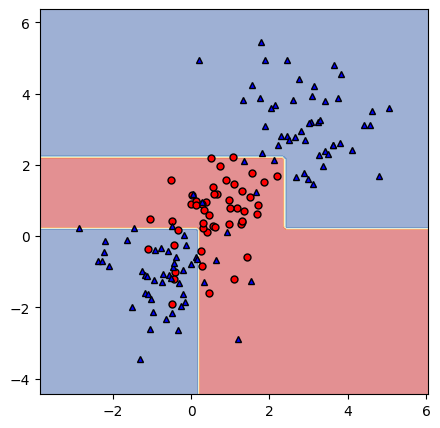

In [15]:
# Plotting decision regions
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clftree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors = ['red', 'blue']
markers = ['o', '^']
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)
for i in range(2):
    if i == 0:
        ax.plot(data[:n,0], data[:n,1], 
                color=colors[0], linestyle='', marker=markers[i], markersize=5,
                markeredgecolor='black')
    else:
        ax.plot(data[n:,0], data[n:,1], 
                color=colors[1], linestyle='', marker=markers[i], markersize=5,
                markeredgecolor='black')

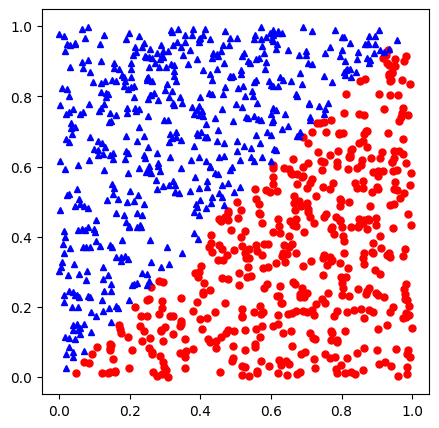

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#%%

# 2차시 그림 5

# 행렬을 다루기 위한 모듈을 불러온다.
import numpy as np 
# plot을 그리기 위한 모듈을 불러온다.
import matplotlib.pylab as plt 

np.random.seed(1)
n = 1000
x = np.array([np.random.uniform(size=2) for _ in range(n)])
label = np.ones(n)
for i in range(n):
    if x[i,0] > x[i, 1]:
        label[i] = 0
        
colors = ['red', 'blue']
markers = ['o', '^']
fig, ax = plt.subplots(1,1, figsize=(5,5))
for i in range(2):
    if i == 0:
        ax.plot(x[np.where(label == 0), 0], x[np.where(label == 0),1], 
                color=colors[0], linestyle='', marker=markers[i], markersize=5)
    else:
        ax.plot(x[np.where(label == 1),0], x[np.where(label == 1),1], 
                color=colors[1], linestyle='', marker=markers[i], markersize=5)

(-0.09923561452181198, 1.080764385478188)

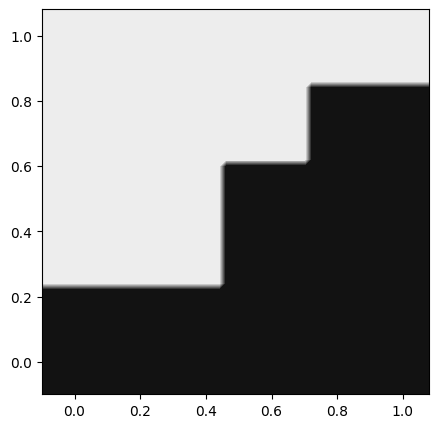

In [18]:
from sklearn.tree import DecisionTreeClassifier 
clftree = DecisionTreeClassifier(max_depth=3, 
                                 max_features=2,
                                 random_state=2).fit(x, label)

x1_min, x1_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
x2_min, x2_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
z = clftree.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
z = z.reshape(xx1.shape)
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.contourf(xx1, xx2, z, alpha=1, cmap='gray')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

(-0.09923561452181198, 1.080764385478188)

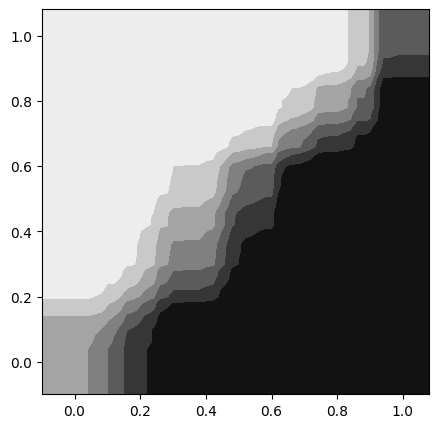

In [19]:
# bagging (평균)

x1_min, x1_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
x2_min, x2_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
result = np.zeros(xx1.shape)
for i in range(100):
    idx = np.random.randint(0, len(x), int(len(x)*0.3))     # index 30퍼만 데이터로 가져옴
    clftree = DecisionTreeClassifier(max_depth=3, 
                                     max_features=2,
                                     random_state=2).fit(x[idx], label[idx])
    Z = clftree.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    result += Z.reshape(xx1.shape) / 100    #결과를 100번 반복해주기 때문에 100으로 나눠줌
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.contourf(xx1, xx2, result, cmap='gray')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())    

(-0.09923561452181198, 1.080764385478188)

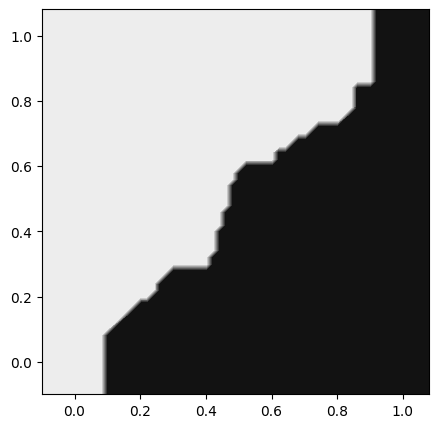

In [20]:
# bagging (voting)

result[np.where(result >= 0.5)] = 1
result[np.where(result < 0.5)] = 0

fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.contourf(xx1, xx2, result, cmap='gray')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())  

In [23]:
import pandas as pd 
# csv 파일 형식으로 되어있는 Default 데이터를 불러온다.
# 데이터: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
default = pd.read_csv('Default.csv', encoding='cp949')
# 데이터 확인
default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [24]:
# min-max 표준화 (x를 balance와 income으로 잡고 두 개의 데이터에 대해 표준화를 함)
x = np.array(default[['balance', 'income']])
x[:, 0] = (x[:, 0] - x[:, 0].min()) / (x[:, 0].max() - x[:, 0].min())
x[:, 1] = (x[:, 1] - x[:, 1].min()) / (x[:, 1].max() - x[:, 1].min())
x[:5, :]

array([[0.2748447 , 0.59890492],
       [0.30786778, 0.15572704],
       [0.40445316, 0.42586159],
       [0.19939197, 0.47995931],
       [0.29599111, 0.51786692]])

In [26]:
y = np.array(list(map(lambda x:1 if x == 'Yes' else 0, default['default'])))[:, np.newaxis]
y[:5, :]

array([[0],
       [0],
       [0],
       [0],
       [0]])

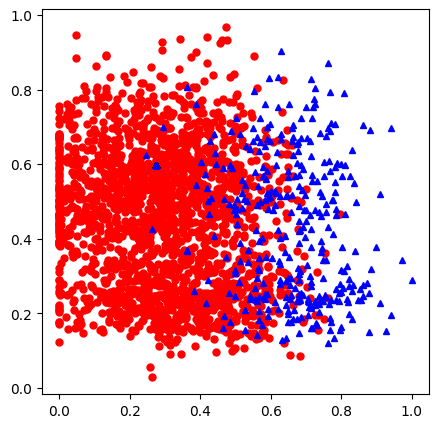

In [27]:
colors = ['red', 'blue']
markers = ['o', '^']
fig, ax = plt.subplots(1,1, figsize=(5,5))
for i in range(2):
    if i == 0:
        ax.plot(x[np.where(y == 0), 0][:, :2000], x[np.where(y == 0), 1][:, :2000], 
                color=colors[0], linestyle='', marker=markers[i], markersize=5)
    else:
        ax.plot(x[np.where(y == 1), 0], x[np.where(y == 1), 1], 
                color=colors[1], linestyle='', marker=markers[i], markersize=5)

(-0.1, 1.1)

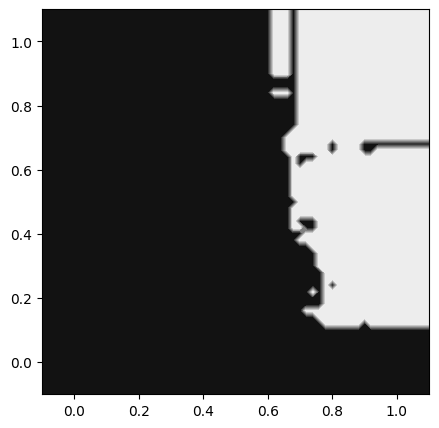

In [28]:
from sklearn.ensemble import RandomForestClassifier 
rftree = RandomForestClassifier(max_depth=10, 
                                random_state=2).fit(x, np.squeeze(y))

x1_min, x1_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
x2_min, x2_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
z = rftree.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
z = z.reshape(xx1.shape)
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.contourf(xx1, xx2, z, alpha=1, cmap='gray')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

(-0.1, 1.1)

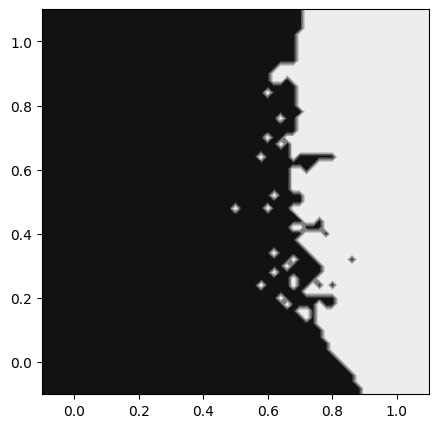

In [29]:
# knn 알고리즘과 랜덤포레스트와 비교

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(x, np.squeeze(y))

x1_min, x1_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
x2_min, x2_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
z = z.reshape(xx1.shape)
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.contourf(xx1, xx2, z, alpha=1, cmap='gray')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# 두 그림의 결과가 크게 다르지 않음

<BarContainer object of 2 artists>

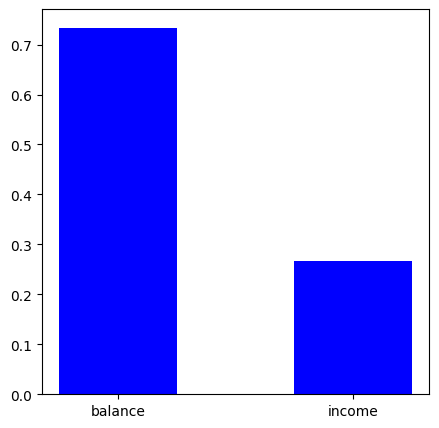

In [30]:
# feature importances

fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.bar(['balance', 'income'], 
        rftree.feature_importances_, width=0.5, color='blue')